In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [18]:
df= pd.read_csv('/Users/SAURABH/Saurabh patil/DATA SCIENCE/Clustering/crime_data.csv')

In [19]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [21]:
df1= df.rename({'Unnamed: 0':'City'},axis=1)

In [22]:
df1.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [23]:
df2 = df1.iloc[:,1:]

In [24]:
df2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.6 KB


In [26]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
# Normalized data frame (considering the numerical part of data)
X = norm_func(df2.iloc[:,:])

# K-Means Clustering

Checking via Elbow method for optimum number of clusters

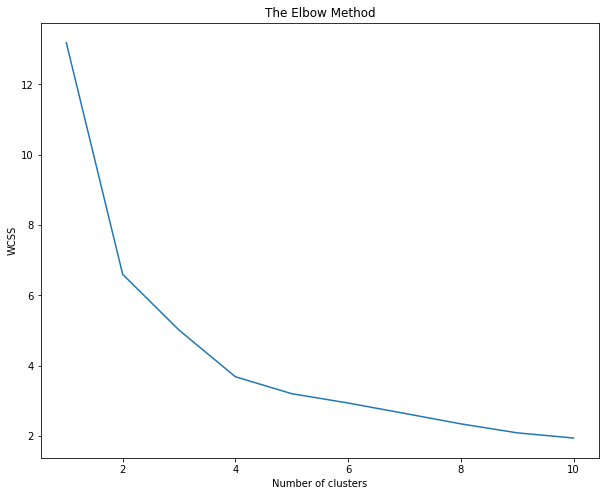

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Confirming the same with Silhouette score

In [29]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.32393600472652184
Silhouette score for k(clusters) = 4 is 0.3408903560074363
Silhouette score for k(clusters) = 5 is 0.31047828422452595
Silhouette score for k(clusters) = 6 is 0.2707459119571354
Silhouette score for k(clusters) = 7 is 0.2702203242750498
Silhouette score for k(clusters) = 8 is 0.2771980367413108
Silhouette score for k(clusters) = 9 is 0.2927119887866063
Silhouette score for k(clusters) = 10 is 0.2390534605964103
Silhouette score for k(clusters) = 11 is 0.24600415117232102
Silhouette score for k(clusters) = 12 is 0.24420922668233289


# Hence, we can conclude that optimum no of clusters = 4

In [30]:
model=KMeans(n_clusters=4) 
model.fit(X)
model.labels_

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 0, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [31]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:5].groupby(df.kclust).mean()

,Murder,Assault,UrbanPop,Rape
kclust,,,,
0,5.852941,141.176471,73.647059,19.335294
1,10.966667,264.000000,76.500000,33.608333
2,13.937500,243.625000,53.750000,21.412500
3,3.600000,78.538462,52.076923,12.176923


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

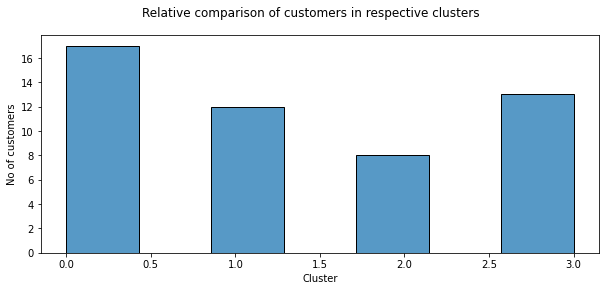

In [32]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

# Hierarchical Clustering

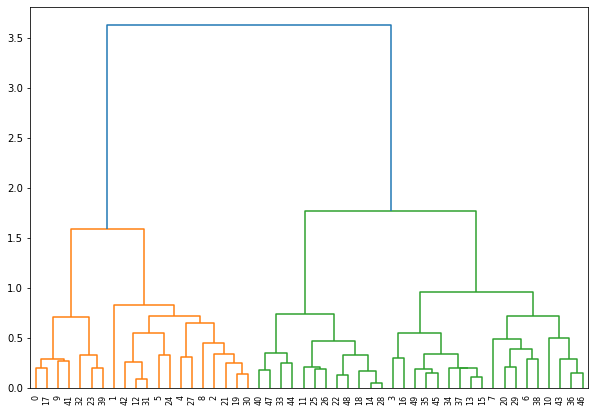

In [33]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 1.5 and cut the dendrogram:

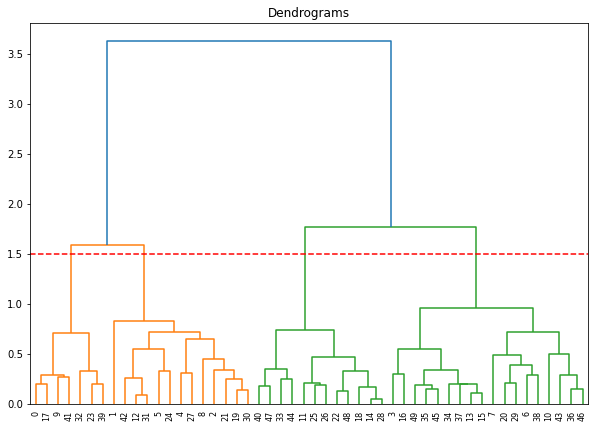

In [34]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

In [35]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [36]:
y_hc = hc.fit_predict(X)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [37]:
Clusters.value_counts()

Clusters
0           47
3            1
2            1
1            1
dtype: int64

In [38]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [39]:
df['hc_clust']= Clusters
df.iloc[:,1:7].groupby(df.hc_clust).mean()

,Murder,Assault,UrbanPop,Rape,kclust,hc_clust
hc_clust,,,,,,
0,7.619149,163.87234,65.468085,20.625532,1.382979,0
1,5.900000,238.00000,72.000000,15.800000,0.000000,1
2,15.400000,335.00000,80.000000,31.900000,1.000000,2
3,10.000000,263.00000,48.000000,44.500000,1.000000,3


Text(0.5, 0.98, 'Relative comparison of cities in respective clusters')

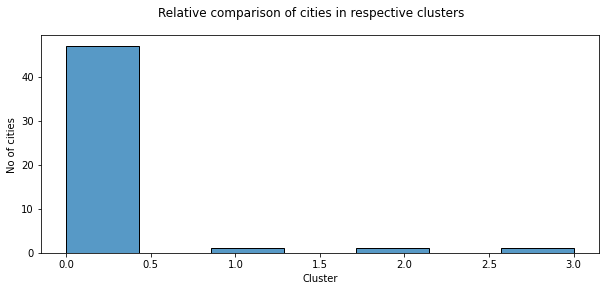

In [40]:
plt.figure(figsize=(10,4))
sns.histplot (x='hc_clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('Relative comparison of cities in respective clusters')

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

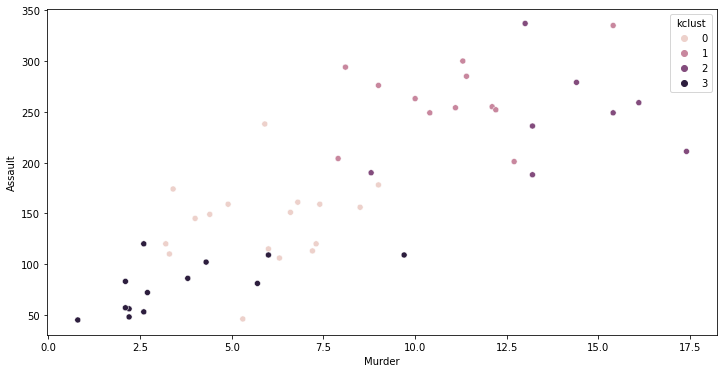

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y =df['Assault'], hue=df['kclust'])

<AxesSubplot:xlabel='Murder', ylabel='Assault'>

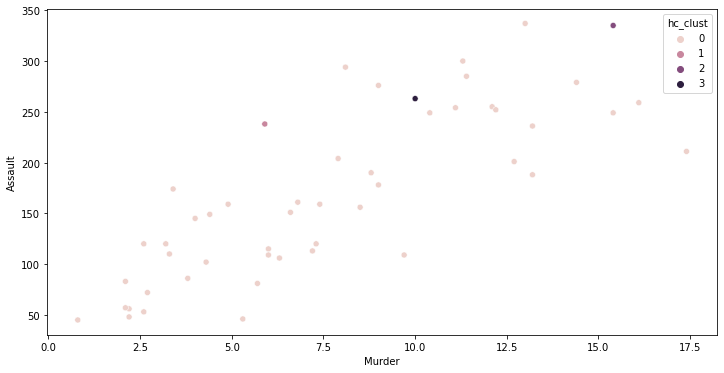

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Murder'], y =df['Assault'], hue=df['hc_clust'])